## Plot stats of Geophone 3 and 4 events

### Import libraries

In [1]:
import pandas as pd
from obspy import read,UTCDateTime
from datetime import datetime, timedelta
import numpy as np
import os
import glob
import sys
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Import functions
fxndir = '../functions/'
sys.path.insert(0,fxndir)
from moon2data import *
from moonquake_temperatures import *

### Load temperature data

In [2]:
# Load
tempdir = '../catalogs/temperature/'
temp_df, int_df = load_temp_cats(tempdir)

# Start and end time of one cycle
starttime_str = int_df.iloc[0]['start times']
starttime = datetime.strptime(int_df.iloc[0]['start times'],'%Y-%m-%d %H:%M:%S')
endtime_str = int_df.iloc[2]['end times']
endtime = datetime.strptime(int_df.iloc[2]['end times'],'%Y-%m-%d %H:%M:%S')

# Times and temperatures 
temp_df_day = temp_df.loc[(temp_df.Time_YMD >= starttime_str) & (temp_df.Time_YMD <= endtime_str)]
times_day = np.array(temp_df_day.Time_s.tolist())/(3600*24)
rock_temps_day = np.array(temp_df_day.T_rock_K.tolist())
reg_temps_day = np.array(temp_df_day.T_reg_K.tolist())

### Inputs to obtain waveforms

In [3]:
parentdir = '/data/ytamama/Apollo17/LSPE_data/sac_volts_ds/'
minfreq = 3
maxfreq = 35
befwin = 6
aftwin = 25

### Load Geophone 3, 4 catalogs

In [4]:
# Geophone 3
mqdir = '../catalogs/final_catalogs/geo3_geo4_events/'
cat1_geo3 = pd.read_csv(mqdir + 'Geophone3_events_catalog_HQ_final.csv')
cat2_geo3 = pd.read_csv(mqdir + 'Geophone3_events_catalog_HQ_avg_event_stats.csv')
cat2_geo3_rpt = cat2_geo3.loc[cat2_geo3.isol_or_rpt == 'repeating']
intdays_geo3_rpt = np.array(cat2_geo3_rpt.avg_interval_day.tolist())
cat2_geo3_isol = cat2_geo3.loc[cat2_geo3.isol_or_rpt == 'isolated']
intdays_geo3_isol = np.array(cat2_geo3_isol.avg_interval_day.tolist())

# Geophone 4
cat1_geo4 = pd.read_csv(mqdir + 'Geophone4_events_catalog_HQ_final.csv')
cat2_geo4 = pd.read_csv(mqdir + 'Geophone4_events_catalog_HQ_avg_event_stats.csv')
cat2_geo4_rpt = cat2_geo4.loc[cat2_geo4.isol_or_rpt == 'repeating']
intdays_geo4_rpt = np.array(cat2_geo4_rpt.avg_interval_day.tolist())
cat2_geo4_isol = cat2_geo4.loc[cat2_geo4.isol_or_rpt == 'isolated']
intdays_geo4_isol = np.array(cat2_geo4_isol.avg_interval_day.tolist())

### Obtain waveforms of a Geophone 3 event

In [5]:
# Average arrival time across geophones
evid_geo3 = '760815-17-N2'
row = cat2_geo3.loc[cat2_geo3.evid == evid_geo3].iloc[0]
arrtime = datetime.strptime(row.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of example
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_geo3 = st1.traces[0].times() - befwin
trdata1_geo3 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_geo3 = st2.traces[0].times() - befwin
trdata2_geo3 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_geo3 = st3.traces[0].times() - befwin
trdata3_geo3 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_geo3 = st4.traces[0].times() - befwin
trdata4_geo3 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_norm_geo3 = trdata1_geo3 / np.max(np.abs(trdata1_geo3))
trdata2_norm_geo3 = trdata2_geo3 / np.max(np.abs(trdata1_geo3))
trdata3_norm_geo3 = trdata3_geo3 / np.max(np.abs(trdata1_geo3))
trdata4_norm_geo3 = trdata4_geo3 / np.max(np.abs(trdata1_geo3))

### Obtain waveforms of Geophone 4 events

In [6]:
# Average arrival time across geophones
evid_geo4 = '770408-13-M2'
row = cat2_geo4.loc[cat2_geo4.evid == evid_geo4].iloc[0]
arrtime = datetime.strptime(row.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of example
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1_geo4 = st1.traces[0].times() - befwin
trdata1_geo4 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2_geo4 = st2.traces[0].times() - befwin
trdata2_geo4 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3_geo4 = st3.traces[0].times() - befwin
trdata3_geo4 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4_geo4 = st4.traces[0].times() - befwin
trdata4_geo4 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_norm_geo4 = trdata1_geo4 / np.max(np.abs(trdata1_geo4))
trdata2_norm_geo4 = trdata2_geo4 / np.max(np.abs(trdata1_geo4))
trdata3_norm_geo4 = trdata3_geo4 / np.max(np.abs(trdata1_geo4))
trdata4_norm_geo4 = trdata4_geo4 / np.max(np.abs(trdata1_geo4))

### Plot temperatures and waveforms

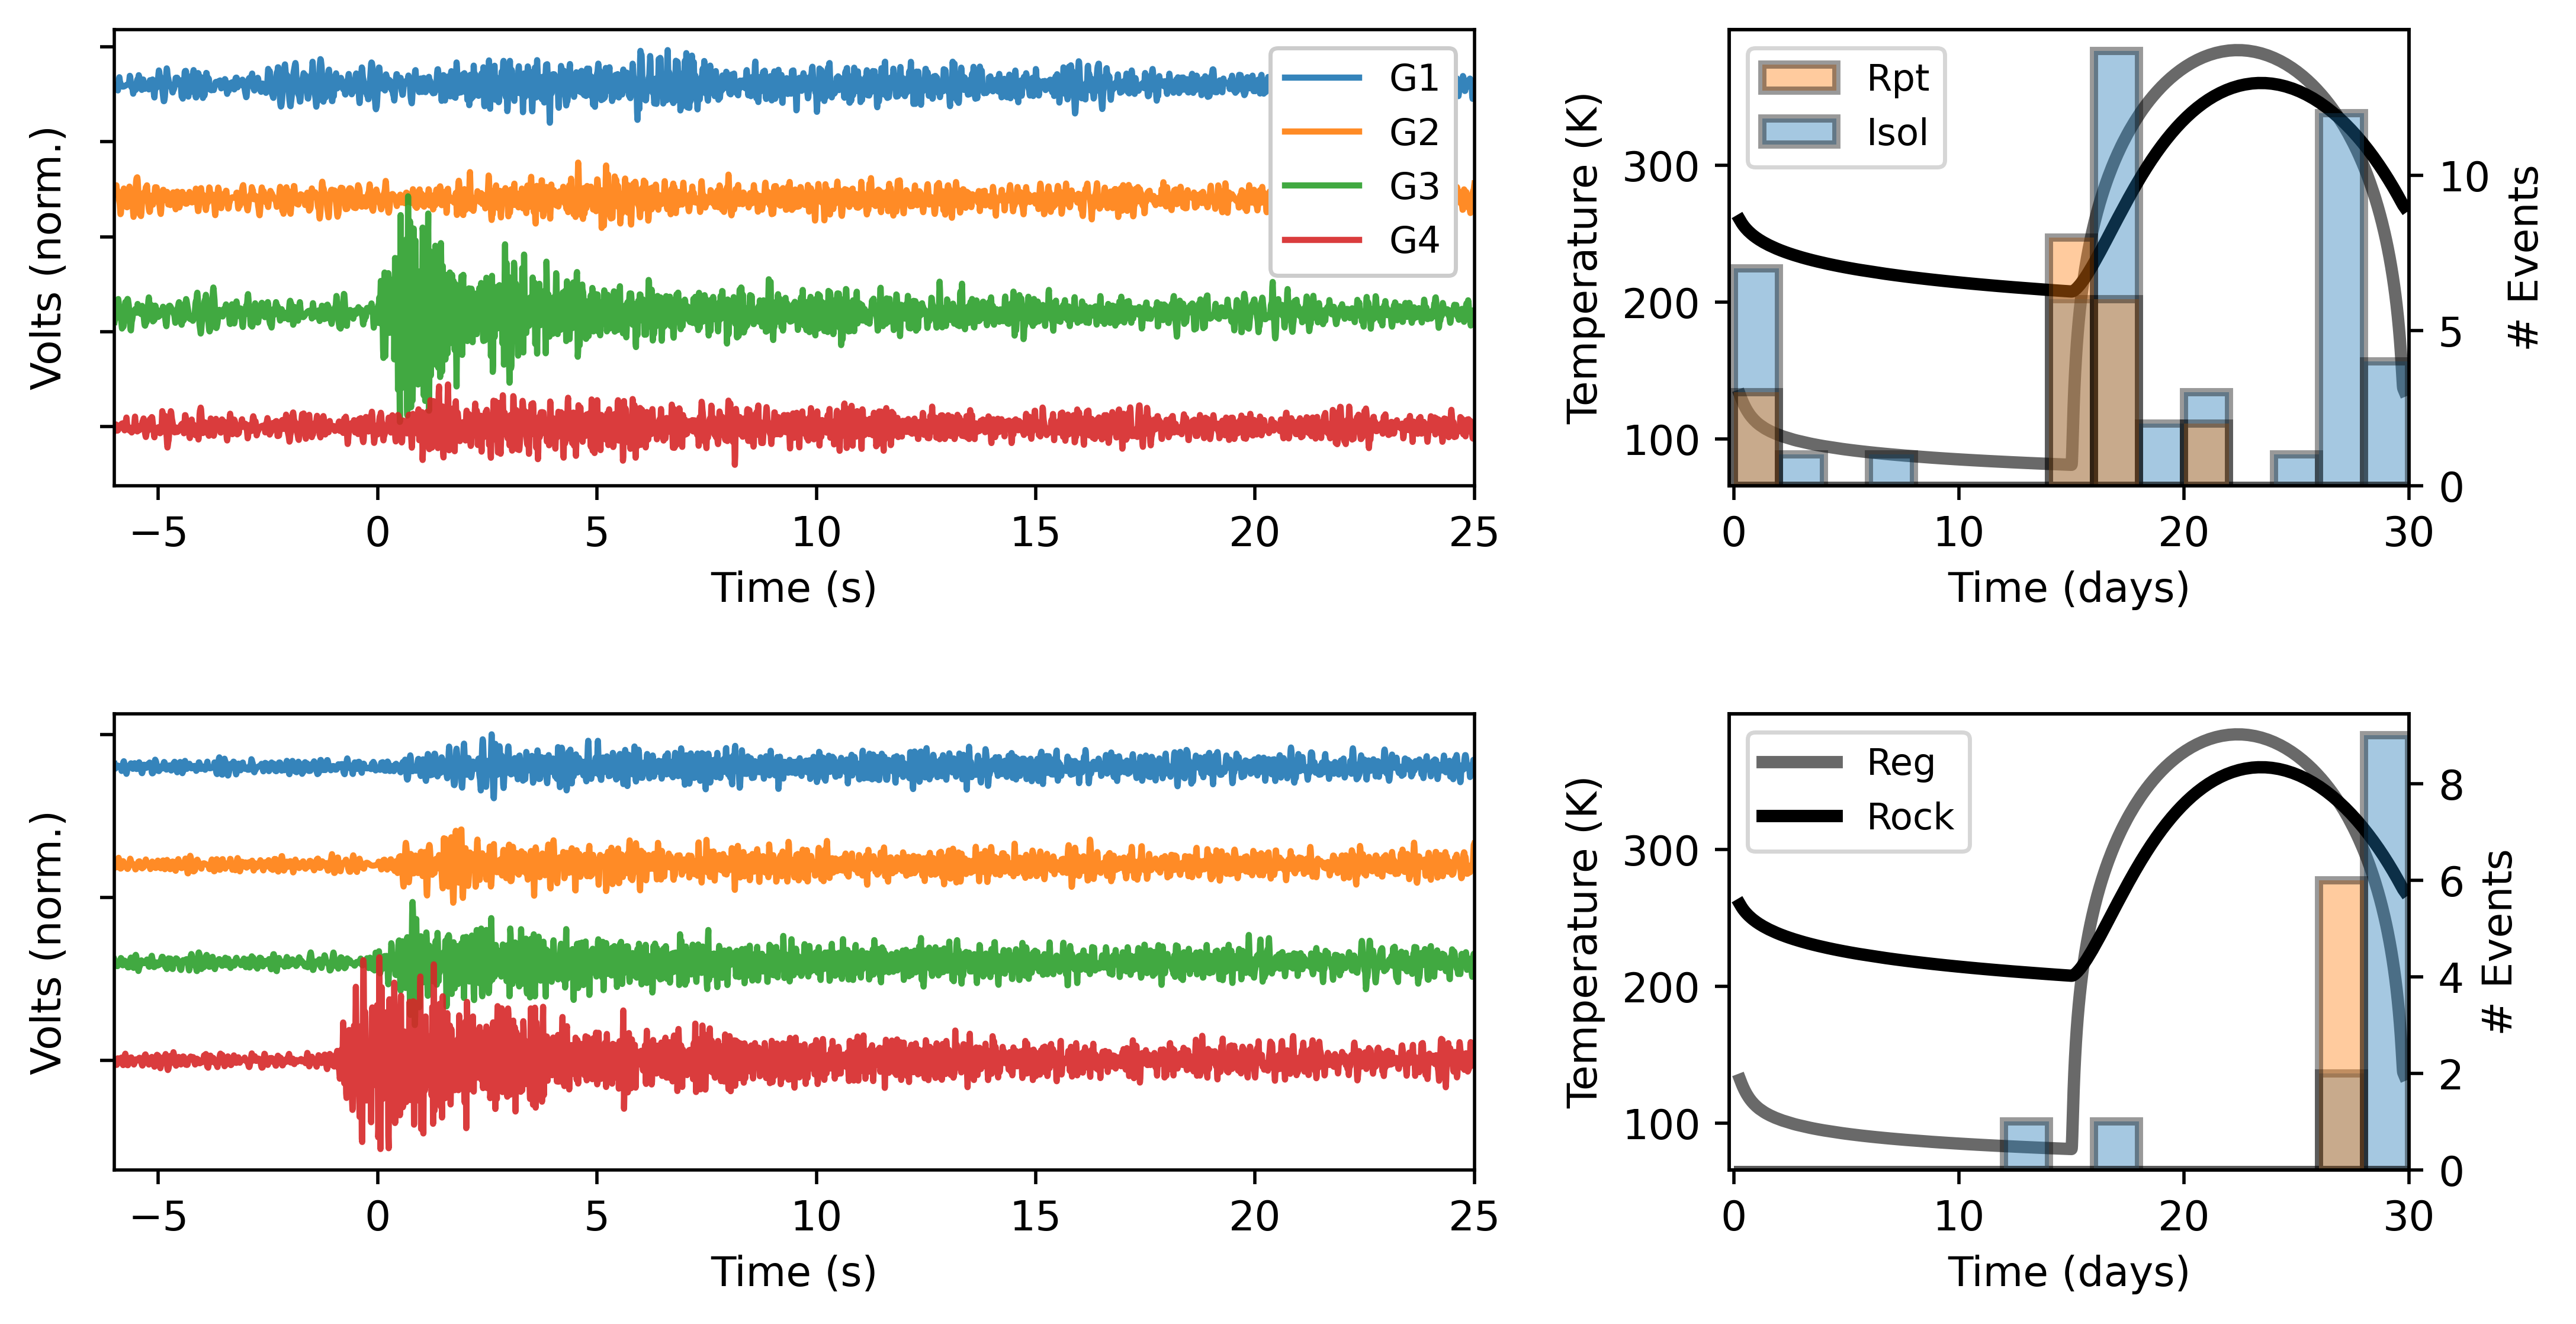

In [8]:
# Initialize figure
fig = plt.figure(figsize=(10., 5), dpi=500)
gs = gridspec.GridSpec(2, 2, width_ratios=(2,1)) 

# Geophone 3
# Temperatures
ax_temp_geo3 = fig.add_subplot(gs[0,1])
ax_temp_geo3.plot(times_day, reg_temps_day, color='dimgrey',label='Reg',linewidth=3)
ax_temp_geo3.plot(times_day, rock_temps_day, color='black',label='Rock',linewidth=3)
ax_temp_geo3.set_xlim([-0.2,30])
ax_temp_geo3.tick_params(axis='both',labelsize=10)
ax_temp_geo3.set_xlabel('Time (days)',fontsize=10)
ax_temp_geo3.set_ylabel('Temperature (K)',fontsize=10)
# Plot temperature of moonquakes
ax_temp2_geo3 = ax_temp_geo3.twinx()
bins = np.arange(0,31,2)
ax_temp2_geo3.hist(intdays_geo3_isol,alpha=0.4,edgecolor='black',linewidth=2,color='C0',bins=bins,label='Isol')
ax_temp2_geo3.hist(intdays_geo3_rpt,alpha=0.4,edgecolor='black',linewidth=2,color='C1',bins=bins,label='Rpt')
hist1 = ax_temp2_geo3.get_children()[0]
hist2 = ax_temp2_geo3.get_children()[-11]
ax_temp2_geo3.set_ylabel('# Events',fontsize=10)
ax_temp2_geo3.legend([hist2, hist1],['Rpt', 'Isol'],loc='upper left',fontsize=9)

# Waveforms
ax_wave_geo3 = fig.add_subplot(gs[0,0])
dist = 2.5
ax_wave_geo3.plot(trtimes1_geo3,trdata1_norm_geo3 + 3.6*dist,color='C0',label=f'G1',alpha=0.9)
ax_wave_geo3.set_xlim([-1*befwin,aftwin])
ax_wave_geo3.set_xlabel('Time (s)',fontsize=10)
ax_wave_geo3.set_ylabel('Volts (norm.)',fontsize=10)
ax_wave_geo3.tick_params(axis='both',labelsize=10)
ax_wave_geo3.set_yticklabels([])
ax_wave_geo3.plot(trtimes2_geo3,trdata2_norm_geo3 + 2.4*dist,color='C1',label=f'G2',alpha=0.9)
ax_wave_geo3.plot(trtimes3_geo3,trdata3_norm_geo3 + 1.2*dist,color='C2',label=f'G3',alpha=0.9)
ax_wave_geo3.plot(trtimes4_geo3,trdata4_norm_geo3,color='C3',label=f'G4',alpha=0.9)
ax_wave_geo3.legend(loc='upper right',framealpha=1,fontsize=9)


# Geophone 4
# Temperatures
ax_temp_geo4 = fig.add_subplot(gs[1,1])
ax_temp_geo4.plot(times_day, reg_temps_day, color='dimgrey',label='Reg',linewidth=3)
ax_temp_geo4.plot(times_day, rock_temps_day, color='black',label='Rock',linewidth=3)
ax_temp_geo4.set_xlim([-0.2,30])
ax_temp_geo4.tick_params(axis='both',labelsize=10)
ax_temp_geo4.set_xlabel('Time (days)',fontsize=10)
ax_temp_geo4.set_ylabel('Temperature (K)',fontsize=10)
ax_temp_geo4.legend(loc='upper left',fontsize=9)
# Plot temperature of moonquakes
ax_temp2_geo4 = ax_temp_geo4.twinx()
bins = np.arange(0,31,2)
ax_temp2_geo4.hist(intdays_geo4_isol,alpha=0.4,edgecolor='black',linewidth=2,color='C0',bins=bins,label='Isol')
ax_temp2_geo4.hist(intdays_geo4_rpt,alpha=0.4,edgecolor='black',linewidth=2,color='C1',bins=bins,label='Rpt')
ax_temp2_geo4.set_ylabel('# Events',fontsize=10)

# Waveforms
ax_wave_geo4 = fig.add_subplot(gs[1,0])
dist = 2.
ax_wave_geo4.plot(trtimes1_geo4,trdata1_norm_geo4 + 4.5*dist,color='C0',label=f'G1',alpha=0.9)
ax_wave_geo4.set_xlim([-1*befwin,aftwin])
ax_wave_geo4.set_xlabel('Time (s)',fontsize=10)
ax_wave_geo4.set_ylabel('Volts (norm.)',fontsize=10)
ax_wave_geo4.tick_params(axis='both',labelsize=10)
ax_wave_geo4.set_yticklabels([])
ax_wave_geo4.plot(trtimes2_geo4,trdata2_norm_geo4 + 3*dist,color='C1',label=f'G2',alpha=0.9)
ax_wave_geo4.plot(trtimes3_geo4,trdata3_norm_geo4 + 1.5*dist,color='C2',label=f'G3',alpha=0.9)
ax_wave_geo4.plot(trtimes4_geo4,trdata4_norm_geo4,color='C3',label=f'G4',alpha=0.9)


# Adjust subplots
plt.subplots_adjust(wspace = 0.25, hspace = 0.5)